### Library

In [26]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv('D:/MATERI/10102019-MIDTEST/q1-annual-water-usage-in-baltimore/water.csv', error_bad_lines=False)

b'Skipping line 82: expected 2 fields, saw 3\n'


In [28]:
df.columns=['year','baltimore-liters-percapita-perday']
df.head()

,year,baltimore-liters-percapita-perday
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [29]:
df.shape

(79, 2)

### I. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).

In [30]:
#dataset = df.sample(frac=0.5, random_state=99)
#validation = df.loc[~df.index.isin(dataset.index), :]

In [31]:
dataset = df[:40]
validation = df[40:]

In [32]:
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

In [33]:
dataset.head()

,year,baltimore-liters-percapita-perday
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [34]:
validation.tail()

,year,baltimore-liters-percapita-perday
74,1959,594
75,1960,587
76,1961,587
77,1962,625
78,1963,613


### II. Create summary of the dataset, with python function.

In [35]:
dataset.describe()

,year,baltimore-liters-percapita-perday
count,40.000000,40.000000
mean,1904.500000,472.325000
std,11.690452,67.456876
min,1885.000000,344.000000
25%,1894.750000,438.000000
50%,1904.500000,471.000000
75%,1914.250000,503.000000
max,1924.000000,662.000000


### III. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.

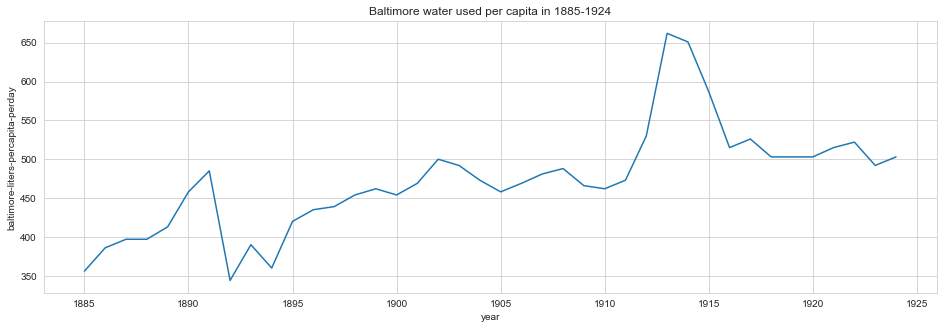

In [36]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x="year", y="baltimore-liters-percapita-perday",data=dataset).set_title('Baltimore water used per capita in 1885-1924')


Hal yang menarik adalah pola lonjakan yang tiba-tiba terjadi. Hal ini dapat terlihat dari dataset (gambar atas), misalnya pada kisaran 1885, lalu terjadi lonjakan pada 1890. Setelah itu, dari 1895 sampai 1910 terjadi peningkatan, lalu terjadi lagi lonjakan pada kisaran 1915. Lalu apabila dilihat dari data validasi (gambar bawah), juga terjadi lonjakan tiba-tiba setelah beberapa tahun. Selanjutnya kita akan melihat per dekadenya.

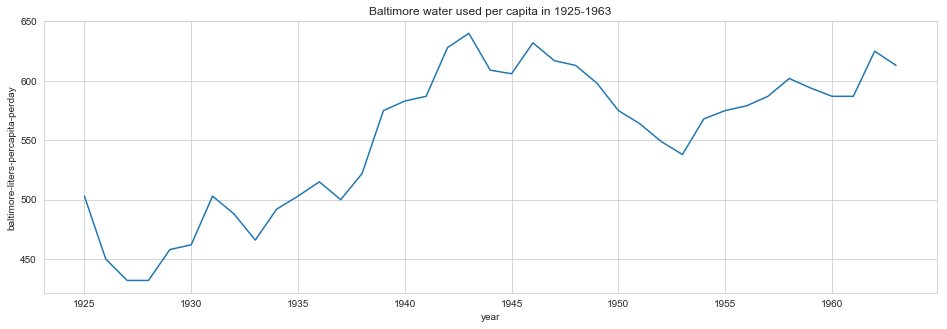

In [37]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x="year", y="baltimore-liters-percapita-perday",data=validation).set_title('Baltimore water used per capita in 1925-1963')

### IV. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.

In [38]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(1885, 1963, 10)]
dataset['decade'] = pd.cut(df.year, range(1885, 1968, 10), right=False, labels=labels)

In [39]:
dataset

,year,baltimore-liters-percapita-perday,decade
0,1885,356,1885 - 1894
1,1886,386,1885 - 1894
2,1887,397,1885 - 1894
3,1888,397,1885 - 1894
4,1889,413,1885 - 1894
5,1890,458,1885 - 1894
6,1891,485,1885 - 1894
7,1892,344,1885 - 1894
8,1893,390,1885 - 1894
9,1894,360,1885 - 1894


#### Melihat visualisasi data pada setiap dekade

In [40]:
to94 = dataset[dataset['decade'] == '1885 - 1894']
to04 = dataset[dataset['decade'] == '1895 - 1904']
to14 = dataset[dataset['decade'] == '1905 - 1914']
to24 = dataset[dataset['decade'] == '1915 - 1924']

Text(0.5,1,'Baltimore water used per capita in 1915-1925')

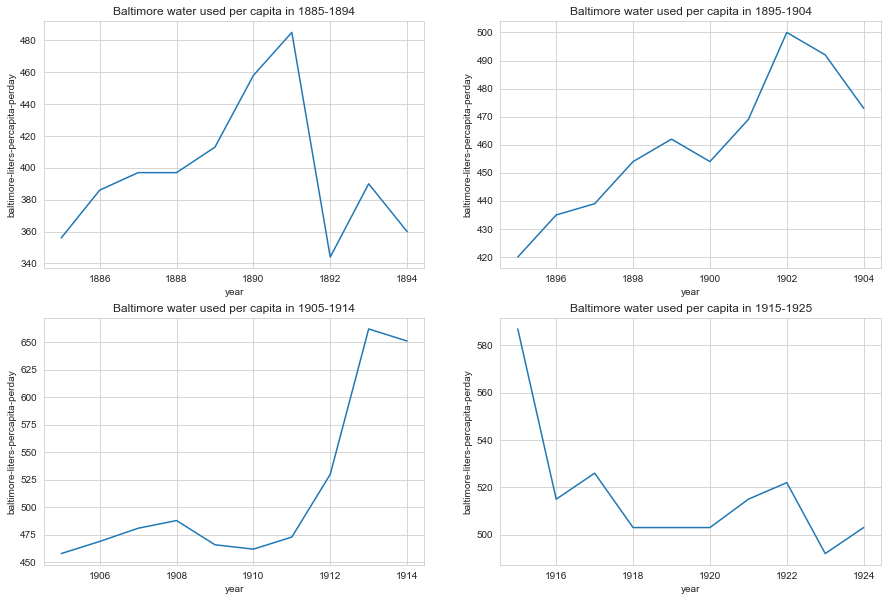

In [41]:
ax=plt.figure(figsize=(15,10))
ax.add_subplot(2,2,1)
sns.lineplot(x="year", y="baltimore-liters-percapita-perday",data=to94).set_title('Baltimore water used per capita in 1885-1894')
ax.add_subplot(2,2,2)
sns.lineplot(x="year", y="baltimore-liters-percapita-perday",data=to04).set_title('Baltimore water used per capita in 1895-1904')
ax.add_subplot(2,2,3)
sns.lineplot(x="year", y="baltimore-liters-percapita-perday",data=to14).set_title('Baltimore water used per capita in 1905-1914')
ax.add_subplot(2,2,4)
sns.lineplot(x="year", y="baltimore-liters-percapita-perday",data=to24).set_title('Baltimore water used per capita in 1915-1925')

Dapat dilihat bahwasanya 3 dekade awal (1885-1894, 1895-1904, 1905-1914) memperkuat asumsi kita bahwasanya terjadi peningkatan signifikan di beberapa periode tertentu. Setelah dibagi sesuai dekadenya, terlihat bahwasanya ada tren peningkatan di akhir dekade. <br>

Tetapi, hal ini tidak terbukti di akhir dekade dataset kita. Bahkan malah terjadi penurunan pada penggunaan air di Baltimore.

#### Melihat penjumlahan hasil air di baltimore per dekade

In [42]:
dataset.head()

,year,baltimore-liters-percapita-perday,decade
0,1885,356,1885 - 1894
1,1886,386,1885 - 1894
2,1887,397,1885 - 1894
3,1888,397,1885 - 1894
4,1889,413,1885 - 1894


In [43]:
dataset2 = dataset[['decade','baltimore-liters-percapita-perday']]
dataset2 = dataset2.groupby('decade').sum()
dataset2 = dataset2[dataset2['baltimore-liters-percapita-perday']!=0]
dataset2['decade'] = dataset.decade.unique()
decade_list= dataset2['decade'].tolist()
baltimore_list= dataset2['baltimore-liters-percapita-perday'].tolist()
dataset3 = [decade_list,baltimore_list]
dataset3 = pd.DataFrame(dataset3)
dataset3 = dataset3.T
dataset3.columns=['decade','sum-of-baltimore-liters-percapita-perdecade']
dataset3.head()

,decade,sum-of-baltimore-liters-percapita-perdecade
0,1885 - 1894,3986
1,1895 - 1904,4598
2,1905 - 1914,5140
3,1915 - 1924,5169


In [44]:
dataset3.astype({'decade': 'category','sum-of-baltimore-liters-percapita-perdecade':'int64'}).dtypes

decade                                         category
sum-of-baltimore-liters-percapita-perdecade       int64
dtype: object

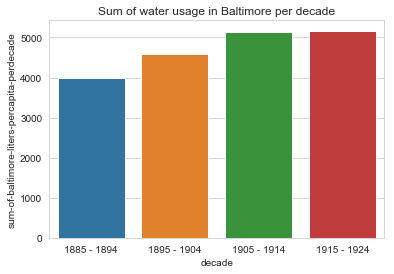

In [45]:
ax = sns.barplot(x="decade", y="sum-of-baltimore-liters-percapita-perdecade", data=dataset3).set_title('Sum of water usage in Baltimore per decade')

Visualisasi diatas sangat mungkin terjadi. Melihat bahwasanya dengan seiring bertambahnya waktu, terjadi peningkatan jumlah penggunaan air (dengan asumsi jumlah penduduk juga ikut meningkat) pada setiap dekadenya.

### V. Create models using ARIMA

#### I. Split the dataset into train and test sets directly <br>
#### II. The first 50% of the dataset will be held back to train the model. <br>
#### III. The remaining 50% of the dataset will be iterated and test the model. <br>

In [46]:
dataset = df[:40]
validation = df[40:]

#### IV.The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.

In [47]:
dataset = dataset.set_index('year')
validation = validation.set_index('year')
dataset.head()

,baltimore-liters-percapita-perday
year,
1885,356
1886,386
1887,397
1888,397
1889,413


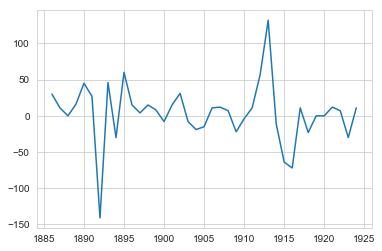

In [48]:
time = dataset.copy()
time['baltimore-liters-percapita-perday']=time['baltimore-liters-percapita-perday']-time['baltimore-liters-percapita-perday'].shift()
plt.plot(time['baltimore-liters-percapita-perday'])

In [49]:
time.head()

,baltimore-liters-percapita-perday
year,
1885,NaN
1886,30.0
1887,11.0
1888,0.0
1889,16.0


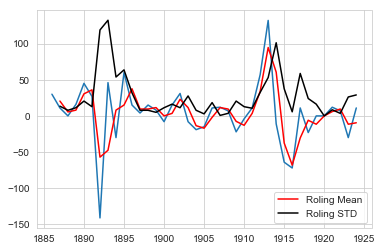

In [50]:
rolmean=time.rolling(window=2).mean()
rolstd=time.rolling(window=2).std()
plt.plot(time)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

In [51]:
time = time[1:]

In [52]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')
dftest=adfuller(time['baltimore-liters-percapita-perday'],autolag='AIC')
print(dftest)
dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-4.528364793453499, 0.00017469150331606093, 1, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 278.14460196379787)


Test Stat             -4.528365
p-value                0.000175
lag_used               1.000000
number of obs used    37.000000
dtype: float64

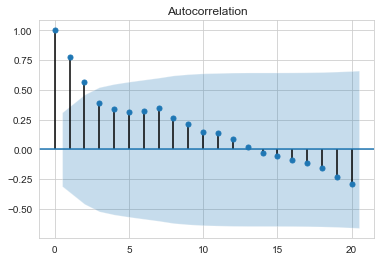

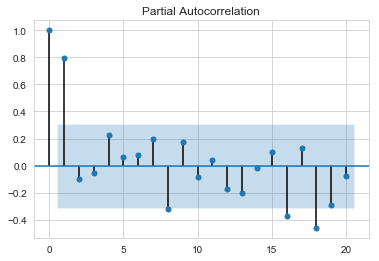

In [53]:
import statsmodels.graphics.tsaplots as sts
sts.plot_acf(dataset,lags=20) #AR
sts.plot_pacf(dataset,lags=20) #MA
#I from variable time (shift)
plt.show()

In [54]:
from pmdarima import auto_arima

In [55]:
model = auto_arima(time, trace=True, error_action='ignore', suppress_warnings=True)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=402.915, BIC=412.897, Fit time=0.436 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=404.168, BIC=407.495, Fit time=0.008 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=406.166, BIC=411.157, Fit time=0.048 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=406.166, BIC=411.156, Fit time=0.072 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=403.400, BIC=411.718, Fit time=0.220 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=404.837, BIC=416.482, Fit time=0.328 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=402.526, BIC=410.844, Fit time=0.252 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=408.161, BIC=414.815, Fit time=0.096 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=403.307, BIC=413.288, Fit time=0.180 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1);

In [56]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [65]:
models=[0,1,0] #pakai data asli
model=ARIMA(np.float64(dataset),order=models) #diffrecing jadi 1
result_ARIMA=model.fit(disp=1)
predict=result_ARIMA.fittedvalues

In [66]:
print('RMSE:',sqrt(mean_squared_error(validation, predict)))
print('MAE :',mean_absolute_error(validation,predict))

RMSE: 552.2720079894314
MAE : 548.9743589743591


In [68]:
models=[3,1,2] #pakai data asli
model=ARIMA(np.float64(dataset),order=models) #diffrecing jadi 1
result_ARIMA=model.fit(disp=1)
predict=result_ARIMA.fittedvalues

#### VI. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only

In [69]:
print('RMSE:',sqrt(mean_squared_error(validation, predict)))
print('MAE :',mean_absolute_error(validation,predict))

RMSE: 555.1821304030835
MAE : 551.6771657253657


#### Prediction

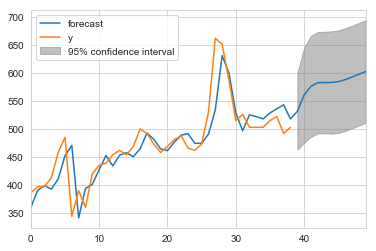

In [72]:
result_ARIMA.plot_predict(1,50)
x=result_ARIMA.forecast(steps=70)